In [12]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import datasets, transforms


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [13]:
X = torch.linspace(-1,1,200).reshape(-1,1)

In [14]:
y=(np.sin(5*(np.pi*X)))/((5*(np.pi*X)))

In [15]:
class Model(nn.Module):
    def __init__(self, inp=1, h2=5, h3=10,h4=10,h5=10,h6=10,h7=10,h8=5, outp=1):
        super().__init__()
        self.fc1 = nn.Linear(inp,h2)    
        self.fc2 = nn.Linear(h2, h3)
        self.fc3 = nn.Linear(h3, h4)
        self.fc4 = nn.Linear(h4, h5)
        self.fc5 = nn.Linear(h5, h6)
        self.fc6 = nn.Linear(h6, h7)
        self.fc7 = nn.Linear(h7, h8)
        self.out = nn.Linear(h8, outp)  

        
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.relu(self.fc4(x))
        x = F.relu(self.fc5(x))
        x = F.relu(self.fc6(x))
        x = F.relu(self.fc7(x))
        x = self.out(x)
        return x

In [16]:
model = Model()

In [17]:
CriterionLoss = nn.MSELoss()

In [18]:
optim = torch.optim.Adam(model.parameters(), lr=0.001)

In [19]:
epochs = 3800
losses = []
grad_norm_list=[]

for i in range(epochs):
    i+=1
    # feed forwarding
    y_pred = model.forward(X)
    
    # calculate loss
    tloss = CriterionLoss(y_pred, y)
    losses.append(tloss)
    
    optim.zero_grad()
    tloss.backward()
    
    optim.step()
    
    # Get gradient norm (From slides)
    grad_all = 0.0
    for p in model.parameters():
        grad = 0.0
        if p.grad is not None:
            grad = (p.grad.cpu().data.numpy() ** 2).sum()
        grad_all += grad
    grad_norm = grad_all ** 0.5
    grad_norm_list.append(grad_norm)

In [20]:
losses=torch.tensor(losses)

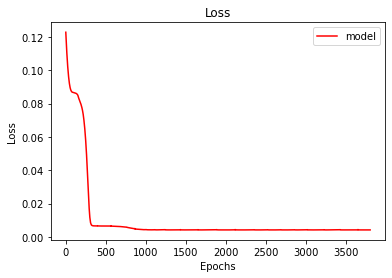

In [21]:
plt.plot(range(epochs), losses.numpy(), 'r', label='model')
plt.title("Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(loc="upper right")
plt.show()

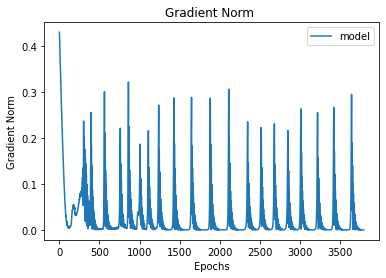

In [22]:
#Gradient norm to iterations
plt.plot(range(epochs), grad_norm_list,label='model')
plt.title("Gradient Norm ")
plt.xlabel("Epochs")
plt.ylabel("Gradient Norm")
plt.legend(loc="upper right")
plt.show()